In [ ]:
!pip install nibabel nilearn matplotlib nilearn[plotting] --quiet
!pip install bids-validator --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 10.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting, image, masking
from nilearn.glm.first_level import FirstLevelModel
from bids_validator import BIDSValidator
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn.glm.first_level import FirstLevelModel
from nilearn import image, masking, plotting
from nilearn.masking import compute_epi_mask

In [ ]:
def validate_bids_structure(bids_path):
    validator = BIDSValidator()
    is_valid = validator.is_bids(bids_path)
    return is_valid

In [ ]:
def load_nifti(file_path):
    return nib.load(file_path)

In [ ]:
def smooth_img(func_img, fwhm=6):
    return image.smooth_img(func_img, fwhm)

def standardize_img(func_img):
    data = func_img.get_fdata()
    mean = np.mean(data, axis=-1, keepdims=True)
    std = np.std(data, axis=-1, keepdims=True)
    standardized_data = (data - mean) / std
    return nib.Nifti1Image(standardized_data, affine=func_img.affine)

def apply_mask(func_img, mask_img=None):
    return masking.apply_mask(func_img, mask_img)

In [ ]:
# def plot_2d_slices(img, title="Scan Slices"):
#     plotting.plot_anat(img, title=title, display_mode='ortho', draw_cross=True)

def plot_3d_brain(img, title="3D Brain"):
    plotting.plot_glass_brain(img, title=title)

# def plot_overlay(anat_img, func_img, title="Functional Overlay"):
#     plotting.plot_anat(anat_img, title=title, display_mode='ortho')
#     plotting.plot_stat_map(func_img, bg_img=anat_img, threshold=1, title=title)

In [ ]:
def plot_2d(img, title=""):
    """
    Plots a 3D anatomical or functional brain image. Plots first timeplot for fMRI scan
    """
    if img.ndim == 4:
        img = image.index_img(img, 0)
    plotting.plot_anat(img, title=title, display_mode='ortho', draw_cross=True)

def plot_overlay(anat_img, func_img, title="Overlay"):
    """
    Plots a functional image over an anatomical background. Defaults to first timepoint for 4D.
    """
    if func_img.ndim == 4:
        func_img = image.index_img(func_img, 0)
    plotting.plot_stat_map(func_img, bg_img=anat_img, title=title, threshold=1.0)


In [ ]:
def run_glm(func_img, events_path, t_r=2.0):
    fmri_glm = FirstLevelModel(t_r=t_r, noise_model='ar1', standardize=True, hrf_model='spm')
    fmri_glm = fmri_glm.fit(func_img, events_file=events_path)
    z_map = fmri_glm.compute_contrast('task', output_type='z_score')
    return z_map

In [ ]:
mask_img = compute_epi_mask(func_img_smooth)

In [ ]:
def run_glm_and_plot(func_img, anat_img, events_file, t_r=2.0, title="GLM Activation (Z-map)"):
    """
    Run a GLM on fMRI data using the given events file and visualize the z-map.
    """

    events_df = pd.read_csv(events_file, sep='\t')
    print(events_df.head())


    model = FirstLevelModel(
    t_r=t_r,
    noise_model='ar1',
    standardize=True,
    hrf_model='spm',
    smoothing_fwhm=None,
    mask_img=mask_img
)
    model = model.fit(func_img, events=events_df)

    design = model.design_matrices_[0]

    #Contrast
    contrast = design.columns[1] if len(design.columns) > 1 else design.columns[0]


    # Compute z-map
    z_map = model.compute_contrast(contrast, output_type='z_score')


    plotting.plot_stat_map(z_map, bg_img=anat_img, title=title, threshold=3.0)
    return z_map


Loading NIfTI file: /content/drive/My Drive/fMRI Data/fMRI/sub-216/anat/sub-216_T1w.nii.gz
Loading NIfTI file: /content/drive/My Drive/fMRI Data/fMRI/sub-216/func/sub-216_task-shapessocial_bold.nii.gz
Applying smoothing...
Standardizing functional image (z-scoring)...


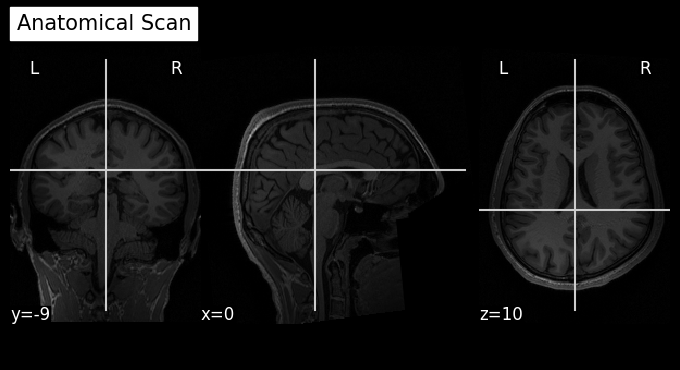

In [ ]:
base_path = "/content/drive/My Drive/fMRI Data/fMRI/sub-216"  # Need to update now that file is changed

anat_path = os.path.join(base_path, "anat", "sub-216_T1w.nii.gz")
func_path = os.path.join(base_path, "func", "sub-216_task-shapessocial_bold.nii.gz")
event_path = os.path.join(base_path, "func", "sub-216_task-shapessocial_events.tsv")


anat_img = load_nifti(anat_path)
func_img = load_nifti(func_path)

# Preprocess
func_img_smooth = smooth_img(func_img)
func_img_z = standardize_img(func_img_smooth)


# plot_2d_slices(anat_img, "Anatomical Scan")
# plot_2d_slices(func_img_z, "Functional (z-scored)")
# plot_overlay(anat_img, func_img_z, "Overlay")
plot_2d(anat_img, "Anatomical Scan")

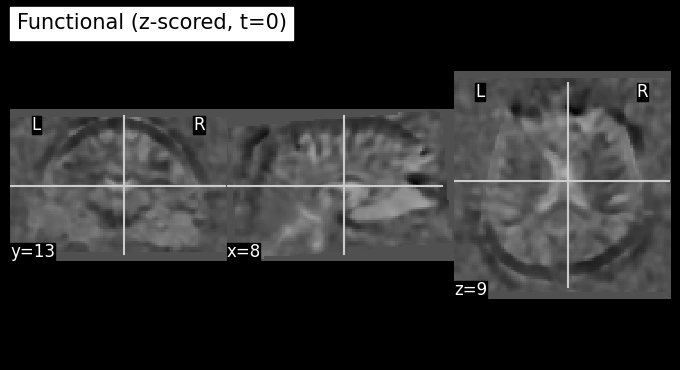

In [ ]:
plot_2d(func_img_z, "Functional (z-scored, t=0)")

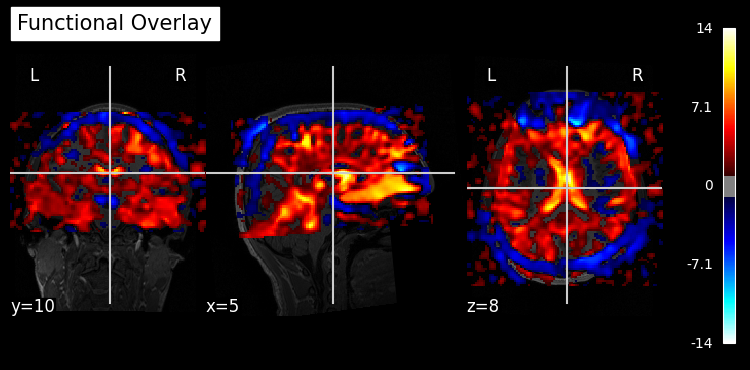

In [ ]:
plot_overlay(anat_img, func_img_z, "Functional Overlay")

Loaded events file:
   onset  duration trial_type               stim_file
0    4.5      37.0      music  shapessocial_audio.wav
1   49.5     408.0      story  shapessocial_audio.wav
Fitting first-level GLM...


/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: stim_file
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/first_level.py:585: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)


Available contrasts: ['music', 'story', 'drift_1', 'drift_2', 'drift_3', 'drift_4', 'drift_5', 'drift_6', 'drift_7', 'drift_8', 'drift_9', 'drift_10', 'drift_11', 'drift_12', 'constant']
Computing contrast: story
Displaying Z-map...


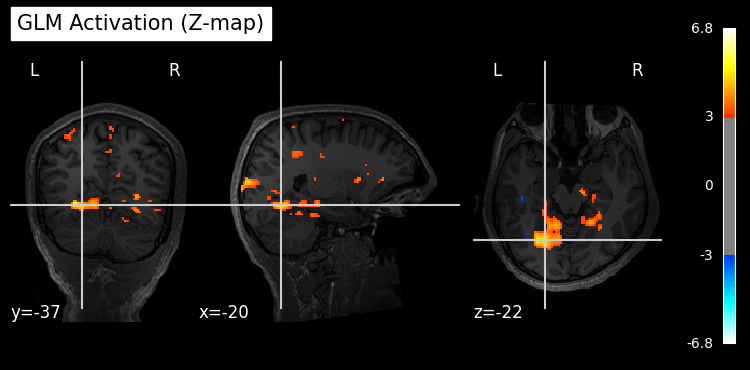

In [ ]:
z_map = run_glm_and_plot(func_img_z, anat_img, event_path)
z_map

In [ ]:
def show_timepoint_slider(img_4d, bg_img=None):
    """
    Interactive slider to scroll through timepoints in fMRI scan.
    """
    n_timepoints = img_4d.shape[-1]

    def plot_timepoint(t):
        display(image.index_img(img_4d, t))
        plotting.plot_stat_map(
            image.index_img(img_4d, t),
            bg_img=bg_img,
            threshold=1.0,
            title=f"Timepoint {t}",
            display_mode='ortho',
            cut_coords=(0, 0, 0)
        )

    slider = widgets.IntSlider(min=0, max=n_timepoints-1, step=1, description='Time:')
    widgets.interact(plot_timepoint, t=slider)


In [ ]:
def show_mean_fmri(func_img_4d, anat_img=None, title="Mean Functional Image"):
    """
    Calculate/plots the mean image across all timepoints in a 4D functional scan.
    """

    mean_img = image.mean_img(func_img_4d)
    plotting.plot_stat_map(mean_img, bg_img=anat_img, title=title, threshold=1.0)
    return mean_img

In [ ]:
show_timepoint_slider(func_img_z, bg_img=anat_img)

interactive(children=(IntSlider(value=0, description='Time:', max=308), Output()), _dom_classes=('widget-inter…

In [ ]:
def interactive_glm_contrast_viewer(func_img_glm, func_img_for_mask, anat_img, events_path, t_r=2.0):
    """
    Fits a GLM using a mask
    func_img_glm: preprocessed fMRI for GLM
    func_img_for_mask: original or smoothed 4D fMRI (not z-scored) for computing brain mask
    """

    events_df = pd.read_csv(events_path, sep='\t')

    #Computing brain mask from non-zscored image
    mask_img = compute_epi_mask(func_img_for_mask)

    model = FirstLevelModel(
        t_r=t_r,
        standardize=True,
        hrf_model='spm',
        mask_img=mask_img
    )
    model = model.fit(func_img_glm, events=events_df)

    design = model.design_matrices_[0]
    contrast_names = design.columns.tolist()

    def plot_contrast(contrast_name):
        z_map = model.compute_contrast(contrast_name, output_type='z_score')
        plotting.plot_stat_map(
            z_map,
            bg_img=anat_img,
            title=f"Z-map for Contrast: {contrast_name}",
            threshold=3.0,
            display_mode='ortho',
            cut_coords=(0, 0, 0)
        )

    widgets.interact(plot_contrast, contrast_name=widgets.Dropdown(options=contrast_names))


In [ ]:
interactive_glm_contrast_viewer(
    func_img_glm=func_img_z,
    func_img_for_mask=func_img_smooth,
    anat_img=anat_img,
    events_path=event_path
)


Computing brain mask from non-zscored image...
Fitting GLM with explicit mask...


/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: stim_file
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/first_level.py:585: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)


interactive(children=(Dropdown(description='contrast_name', options=('music', 'story', 'drift_1', 'drift_2', '…

Computing mean image across time...


<ipython-input-44-2da03efe36dd>:6: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(func_img_4d)
/usr/local/lib/python3.11/dist-packages/nilearn/plotting/find_cuts.py:148: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


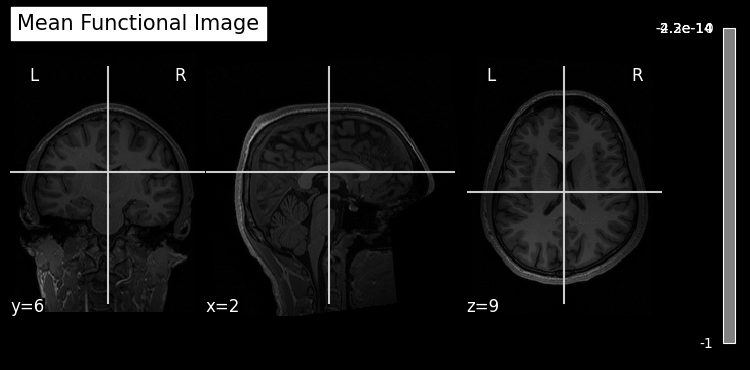

In [ ]:
mean_func = show_mean_fmri(func_img_z, anat_img=anat_img)

In [ ]:
def top_voxel_fits(model, func_img, top_n=5):
    """
    Plot GLM fits for top N voxels with highest model R².
    """
    mask_img = model.mask_img_
    masked_data = masking.apply_mask(func_img, mask_img)
    predicted = model.predicted[0]

    residuals = masked_data - predicted
    rss = np.sum(residuals ** 2, axis=0)
    tss = np.sum((masked_data - masked_data.mean(axis=0)) ** 2, axis=0)
    r_squared = 1 - (rss / tss)

    best_voxels = np.argsort(-r_squared)[:top_n]
    print(f"Top {top_n} voxel indices (in mask space):", best_voxels)

    for i, idx in enumerate(best_voxels):
        plt.figure(figsize=(10, 3))
        plt.plot(model.frame_times, masked_data[:, idx], label='Observed', marker='o')
        plt.plot(model.frame_times, predicted[:, idx], label='Predicted', linestyle='--')
        plt.title(f"Top-{i+1} Fit (Voxel Index in Mask: {idx}) - R²: {r_squared[idx]:.3f}")
        plt.xlabel("Time (s)")
        plt.ylabel("BOLD Signal")
        plt.legend()
        plt.tight_layout()
        plt.show()


In [ ]:
def interactive_voxel_fit(model, func_img):
    x_widget = widgets.IntSlider(min=0, max=func_img.shape[0]-1, description='x')
    y_widget = widgets.IntSlider(min=0, max=func_img.shape[1]-1, description='y')
    z_widget = widgets.IntSlider(min=0, max=func_img.shape[2]-1, description='z')

    def update(x, y, z):
        plot_voxel_fit(model, (x, y, z), func_img)

    display(widgets.interactive(update, x=x_widget, y=y_widget, z=z_widget))


In [ ]:
events_df = pd.read_csv(event_path, sep='\t')

mask_img = compute_epi_mask(func_img_smooth)


model = FirstLevelModel(
    t_r=2.0,  # double check TR data uses
    noise_model='ar1',
    standardize=True,
    hrf_model='spm',
    mask_img=mask_img
)


model = model.fit(func_img_z, events=events_df)

/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: stim_file
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/first_level.py:585: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)


In [ ]:
def plot_voxel_fit(model, voxel_coords, func_img, mask_img, title="GLM Fit at Voxel"):
    """
    Plot actual vs predicted BOLD signal for a specific voxel (x, y, z) using a mask.
    """
    x, y, z = voxel_coords

    mask_data = mask_img.get_fdata().astype(bool)

    if not mask_data[x, y, z]:
        raise ValueError(f"Voxel {voxel_coords} is outside the mask")


    voxel_index_3d = np.ravel_multi_index((x, y, z), mask_data.shape)

    mask_flat = mask_data.flatten()
    masked_indices = np.where(mask_flat)[0]

    try:
        masked_index = np.where(masked_indices == voxel_index_3d)[0][0]
    except IndexError:
        raise ValueError(f"Voxel {voxel_coords} is not in the brain mask.")

    actual = masking.apply_mask(func_img, mask_img)[:, masked_index]
    predicted = model.predicted[0][:, masked_index]


    plt.figure(figsize=(10, 4))
    plt.plot(model.frame_times, actual, label='Observed BOLD', marker='o')
    plt.plot(model.frame_times, predicted, label='GLM Prediction', linestyle='--')
    plt.xlabel("Time (s)")
    plt.ylabel("Signal")
    plt.title(f"{title} at voxel {voxel_coords} (mask index {masked_index})")
    plt.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
model = FirstLevelModel(
    t_r=2.0,  # double check TR data uses
    noise_model='ar1',
    standardize=True,
    hrf_model='spm',
    mask_img=mask_img,
    minimize_memory=False
)

model = model.fit(func_img_z, events=pd.read_csv(event_path, sep='\t'))

/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/experimental_paradigm.py:177: UserWarning: The following unexpected columns in events data will be ignored: stim_file
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/nilearn/glm/first_level/first_level.py:585: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)


In [ ]:
def plot_voxel_fit2(model, voxel_coords, func_img, mask_img, title="GLM Fit at Voxel"):
    """
    Plot actual vs predicted BOLD signal for a specific voxel (x, y, z).
    All image objects are accessed safely via .get_fdata().
    """
    x, y, z = voxel_coords


    mask_data = mask_img.get_fdata().astype(bool)

    try:
        if not mask_data[x, y, z]:
            raise ValueError(f"Voxel {voxel_coords} is outside the mask")
    except IndexError:
        raise ValueError(f"Voxel {voxel_coords} is outside image bounds")

    flat_index = np.ravel_multi_index((x, y, z), mask_data.shape)
    masked_voxel_indices = np.where(mask_data.flatten())[0]

    try:
        masked_index = np.where(masked_voxel_indices == flat_index)[0][0]
    except IndexError:
        raise ValueError(f"Voxel {voxel_coords} not found in the mask")

    actual_ts = masking.apply_mask(func_img, mask_img)[:, masked_index]
    predicted_ts = model.predicted[0][:, masked_index]

    plt.figure(figsize=(10, 4))
    plt.plot(model.frame_times, actual_ts, label="Observed BOLD", marker='o')
    plt.plot(model.frame_times, predicted_ts, label="Predicted", linestyle='--')
    plt.xlabel("Time (s)")
    plt.ylabel("Signal")
    plt.title(f"{title} at voxel {voxel_coords} (mask idx {masked_index})")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
plot_voxel_fit2(
    model=model,
    voxel_coords=(30, 50, 40),
    func_img=func_img_z,
    mask_img=mask_img
)


TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

In [ ]:
def plot_voxel_fit4(model, voxel_coords, func_img, mask_img, title="GLM Fit at Voxel"):
    """
    Plot actual vs predicted BOLD signal for a specific voxel (x, y, z).
    Ensures all objects are NumPy arrays before any indexing.
    """
    x, y, z = voxel_coords


    if hasattr(mask_img, "get_fdata"):
        mask_data = mask_img.get_fdata().astype(bool)
    else:
        mask_data = mask_img.astype(bool)

    print("Type of mask_data:", type(mask_data))


    try:
        if not mask_data[x, y, z]:
            raise ValueError(f"Voxel {voxel_coords} is outside the brain mask.")
    except TypeError as e:
        print("mask_data IS STILL A NIfTI OBJECT SOMEHOW")
        raise e


    observed_matrix = masking.apply_mask(func_img, mask_img)
    predicted_matrix = model.predicted[0]


    flat_index = np.ravel_multi_index((x, y, z), mask_data.shape)
    all_masked_indices = np.where(mask_data.flatten())[0]

    try:
        masked_index = np.where(all_masked_indices == flat_index)[0][0]
    except IndexError:
        raise ValueError(f"Voxel {voxel_coords} not found in mask.")


    plt.figure(figsize=(10, 4))
    plt.plot(model.design_matrices_[0].index.values, observed_matrix[:, masked_index], label='Observed BOLD', marker='o')
    plt.plot(model.design_matrices_[0].index.values, predicted_matrix[:, masked_index], label='Predicted BOLD', linestyle='--')
    plt.xlabel("Time (s)")
    plt.ylabel("BOLD Signal")
    plt.title(f"{title} at voxel {voxel_coords} (mask index {masked_index})")
    plt.legend()
    plt.tight_layout()
    plt.show()


✅ Type of mask_data: <class 'numpy.ndarray'>


TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

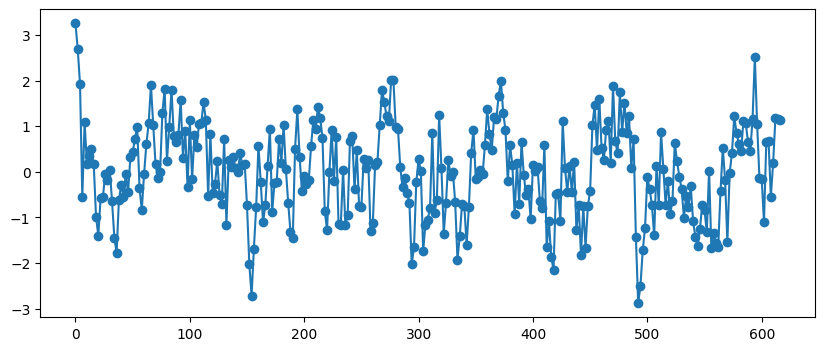

In [ ]:
plot_voxel_fit4(model, voxel_coords=(30, 50, 40), func_img=func_img_z, mask_img=mask_img)

